In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
df = pd.read_csv('Companies.csv')

In [25]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [27]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace('[,]', '', regex=True).astype(int)
df['Revenue growth'] = df['Revenue growth'].replace('%', '', regex=True).astype(float)
df['Employees'] = df['Employees'].replace('[,]', '', regex=True).astype(int)

In [28]:
df = df.rename(columns={'Revenue (USD millions)': 'Revenue(M)'})
df.head()

,Rank,Name,Industry,Revenue(M),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska"


In [29]:
#Top 10 companies revenue
top_10_revenue = df.sort_values('Revenue(M)', ascending=False).head(10)
print(top_10_revenue)

   Rank                  Name                        Industry  Revenue(M)  \
0     1               Walmart                          Retail      648125   
1     2                Amazon      Retail and cloud computing      574785   
2     3                 Apple            Electronics industry      383482   
3     4    UnitedHealth Group                      Healthcare      371622   
4     5    Berkshire Hathaway                    Conglomerate      364482   
5     6            CVS Health                      Healthcare      357776   
6     7            ExxonMobil              Petroleum industry      344582   
7     8              Alphabet  Technology and cloud computing      307394   
8     9  McKesson Corporation                          Health      276711   
9    10               Cencora              Pharmacy wholesale      262173   

   Revenue growth  Employees                Headquarters  
0             6.0    2100000       Bentonville, Arkansas  
1            11.9    1525000      

In [31]:
industry_counts = df['Industry'].value_counts()
industry_counts.head(15)

Industry
Financials                        13
Retail                            10
Petroleum industry                 9
Pharmaceutical industry            6
Technology                         6
Healthcare                         6
Insurance                          5
Telecommunications                 3
Airline                            3
Technology and cloud computing     3
Conglomerate                       3
Food processing                    2
Beverage                           2
Automotive industry                2
Financial                          2
Name: count, dtype: int64

In [35]:
avg_revenue_by_industry = df.groupby('Industry')['Revenue(M)'].mean()
avg_revenue_by_industry.sort_values(ascending=False)

Industry
Retail and cloud computing             574785.000000
Electronics industry                   383482.000000
Health                                 276711.000000
Pharmacy wholesale                     262173.000000
Financial services                     239425.000000
Healthcare                             220786.166667
Technology and cloud computing         193723.000000
Automotive industry                    174016.500000
Conglomerate                           167118.666667
Retail                                 161548.400000
Health insurance                       150819.500000
Petroleum industry                     135590.666667
Conglomerate and telecommunications    122428.000000
Telecommunications                     103384.333333
Financials                              98394.769231
Automotive and energy                   96773.000000
Food industry                           93935.000000
Transportation                          90556.500000
Media                                

In [36]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

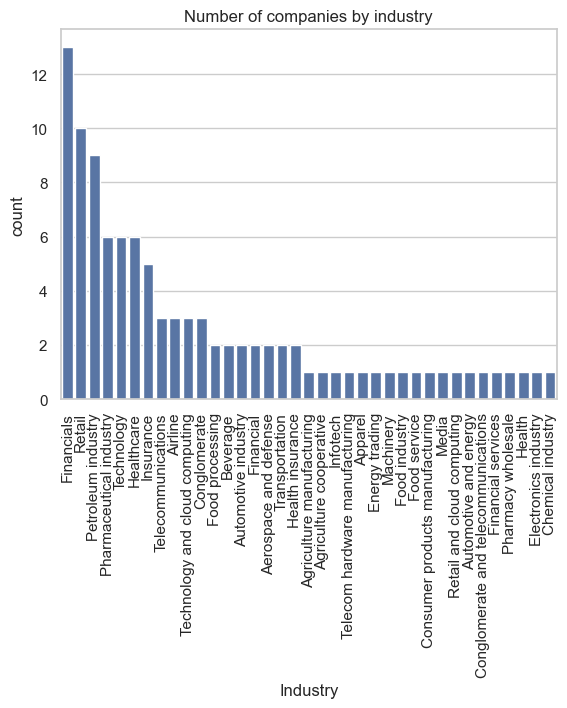

In [37]:
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of companies by industry')
plt.show()

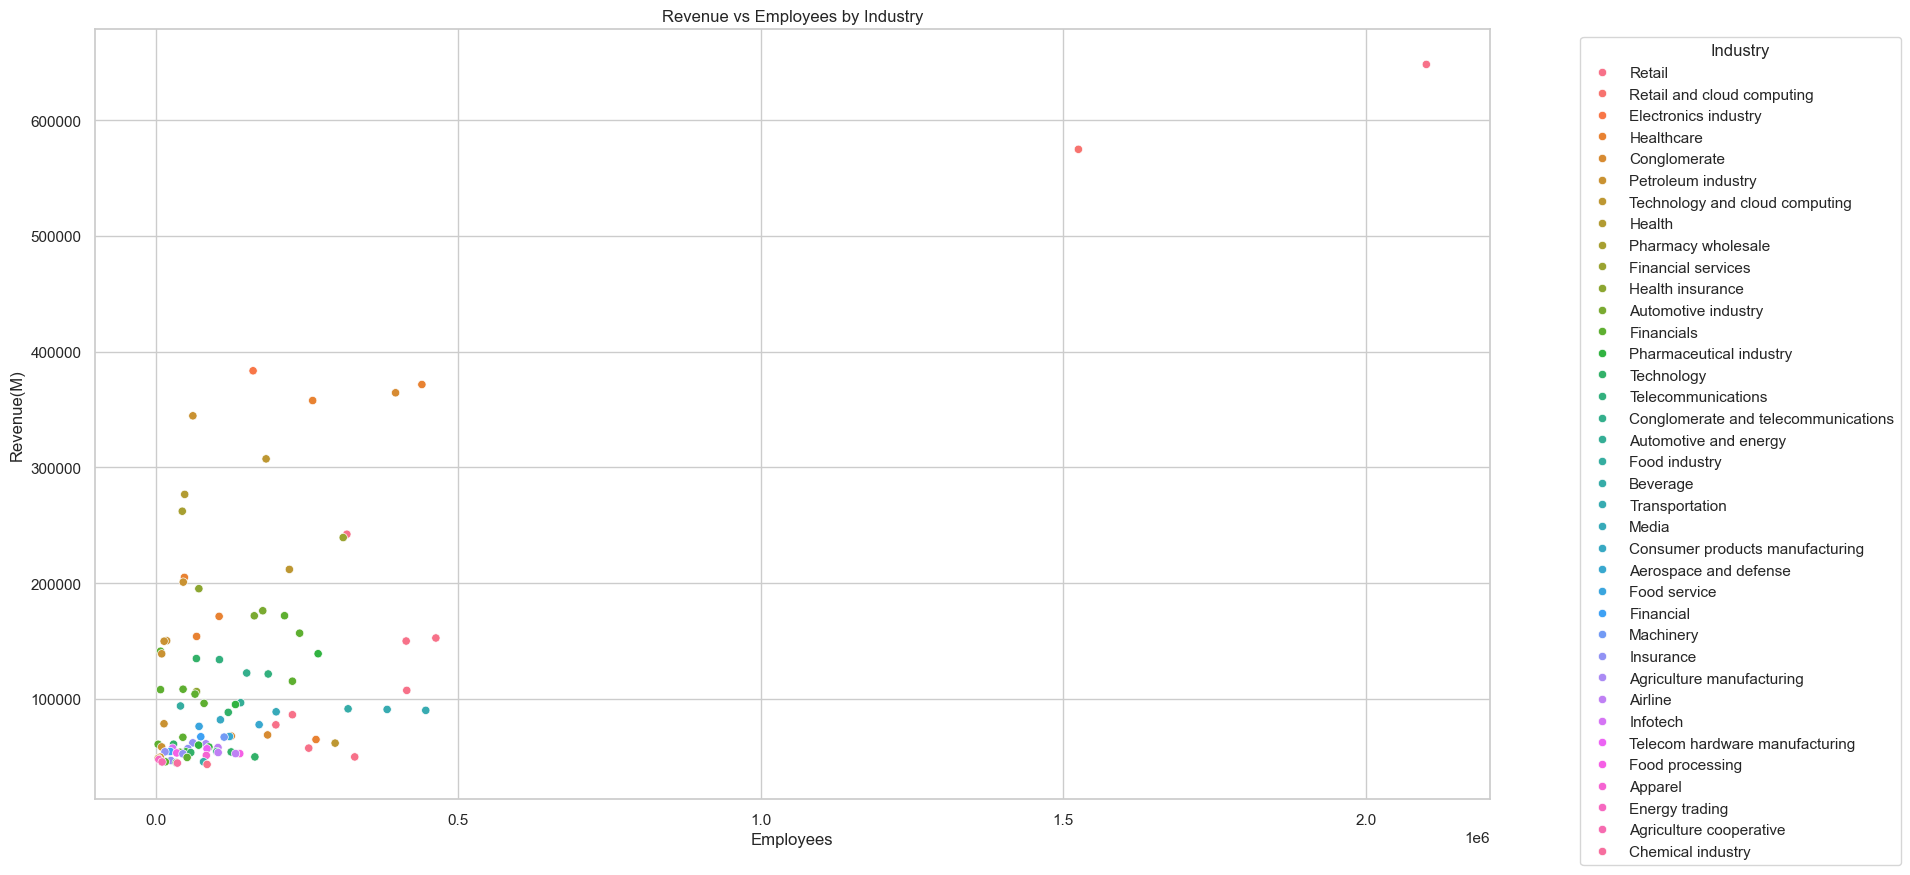

In [50]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x='Employees', y='Revenue(M)', hue='Industry')
plt.title('Revenue vs Employees by Industry')
plt.legend(loc='upper right', bbox_to_anchor=(1.30,1), title='Industry')
plt.show()

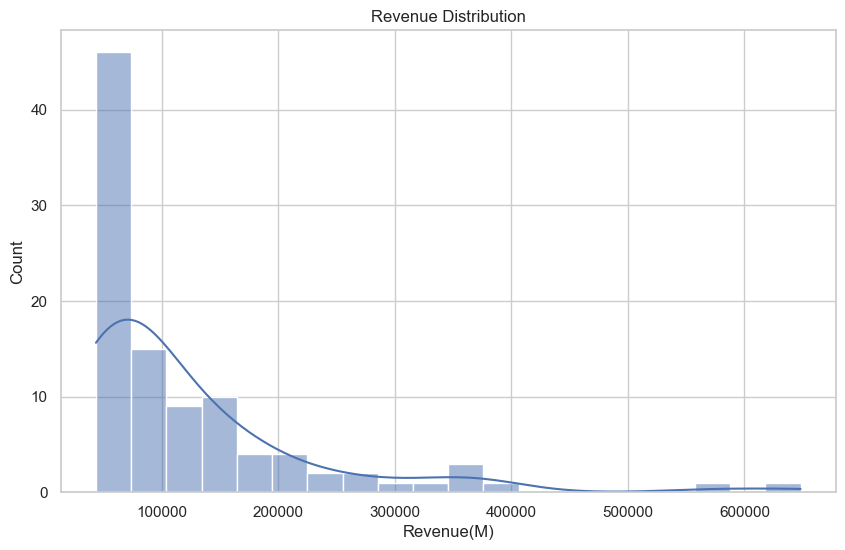

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue(M)'],bins=20, kde=True)
plt.title('Revenue Distribution')
plt.show()

In [53]:
correlation = df[['Revenue(M)','Employees']].corr()
print(correlation)

            Revenue(M)  Employees
Revenue(M)    1.000000   0.699229
Employees     0.699229   1.000000


In [55]:
mean_revenue = df['Revenue(M)'].mean()
print(f"Mean revenue: {mean_revenue} millions")

median_revenue = df['Revenue(M)'].median()
print(f"Median revenue: {median_revenue} millions")


Mean revenue: 122346.09 millions
Median revenue: 80296.0 millions


In [56]:
# KMEANS Model

data = df[['Revenue(M)','Employees']].dropna()

# create and ajust the model
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data)

# Add the clusters to the original dataframe 
df['Cluster'] = data['Cluster']

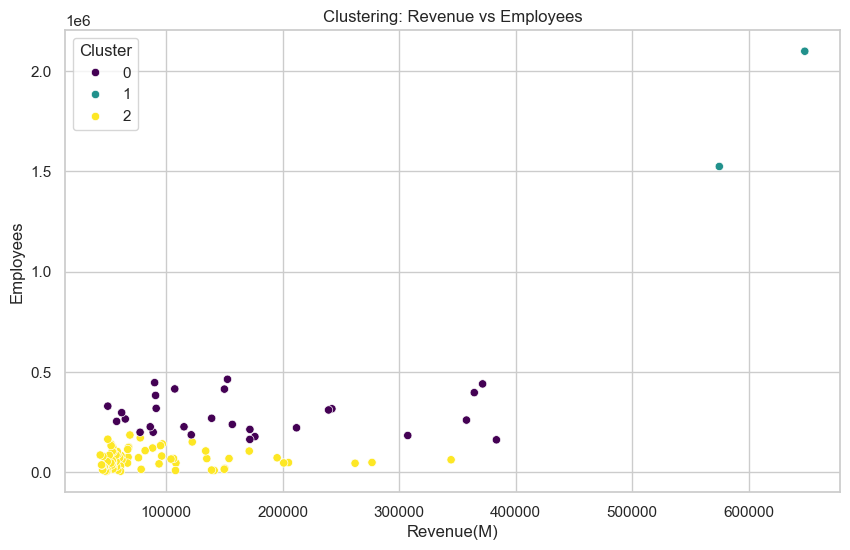

In [57]:
# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Revenue(M)', y='Employees', hue='Cluster', palette='viridis')
plt.title('Clustering: Revenue vs Employees')
plt.show()

In [58]:
df

,Rank,Name,Industry,Revenue(M),Revenue growth,Employees,Headquarters,Cluster
0,1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas",1
1,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington",1
2,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California",0
3,4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota",0
4,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska",0
...,...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735,11.8,16023,"New York City, New York",2
96,97,CHS,Agriculture cooperative,45590,-4.6,10609,"Inver Grove Heights, Minnesota",2
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006,-2.5,34100,"New York City, New York",2
98,99,Dow Chemical Company,Chemical industry,44622,-21.6,35900,"Midland, Michigan",2


In [59]:
df.to_csv(r'/Users/joaorocha/Desktop/webScrapping/CompaniesCluster.csv', index=False)